# Identifying Gambling Addiction in Players on Betting Platforms

Identify gambling addiction in players on betting platforms, focusing on how addiction develops over time and the contributing factors

Key Scope to  keep in mind while finding insights are

Focus on online betting platforms , Analyze player data to identify addiction patterns over time , Explore additional causes, such as platform features & psychological triggers , or demographic factors .

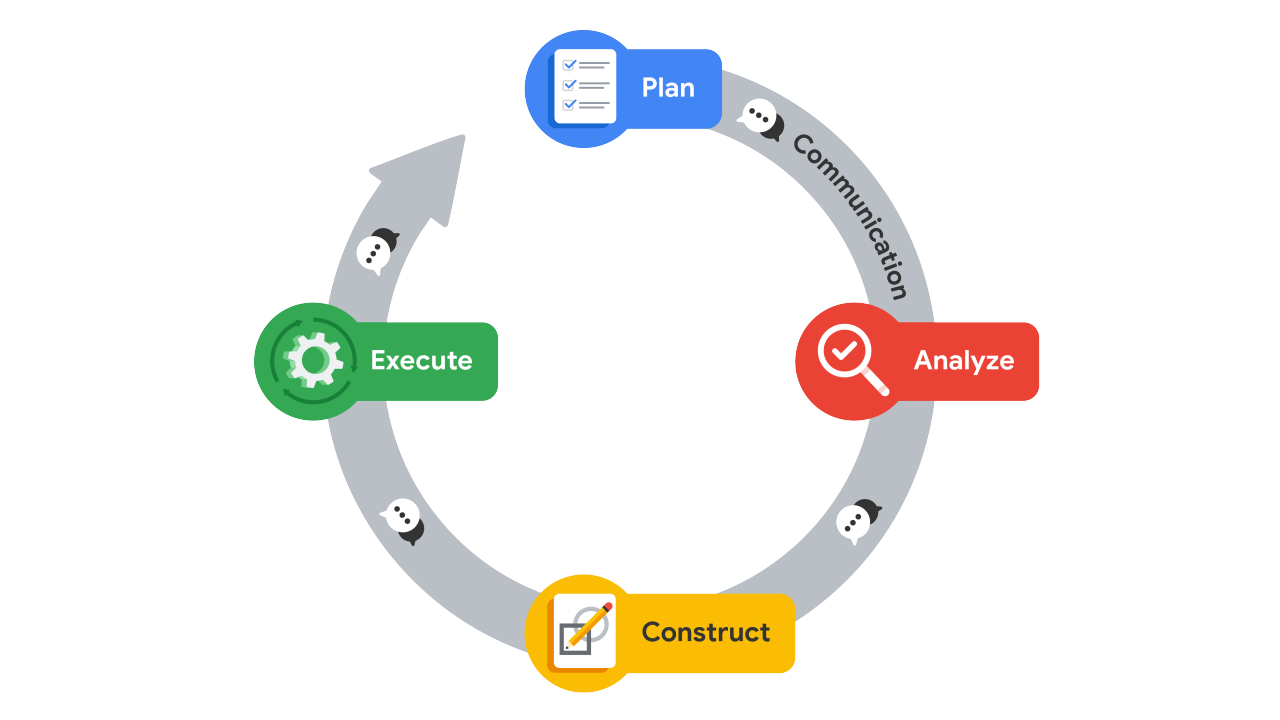

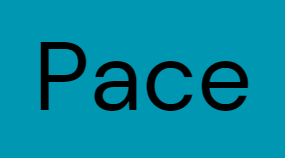

In [18]:
# Analysis
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Model Libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# File Reader
import pickle
import math

Conversion of `excel` file to `pickle` for faster compilation

In [2]:
# converting file bet.xlsx to bet.pkl
bets_pic = pd.read_excel("data/pickels/bet_copy.xlsx")
bets_pic.to_pickle("bet_pik.pkl")
# converting file game.xlsx to game.pkl
games_pic = pd.read_excel("data/pickels/game_copy.xlsx")
games_pic.to_pickle("game_pik.pkl")

Importing files and reading them as `pickle` / `.pkl`

In [3]:
# importing file games
with open("data/pickels/game_pik.pkl" , 'rb') as to_read:
    game = pickle.load(to_read)

game.shape

(71625, 12)

In [4]:
# importing file bets
with open("data/pickels/bet_pik.pkl" , 'rb') as to_read:
    bet = pickle.load(to_read)

bet.shape

(300000, 8)

Understanding datasets and columns for further analysis and validations

In [21]:
game.head()

,id,game_id,max_rate,total_bet_amount,total_win_amount,total_profit_amount,player_count,bet_count,timestamp,date,date2,Time
0,1,2828375,6.43,15.696372,26.377635,10.681263,206,217,1599622213,2020-09-08 23:30:13,2020-09-08,11:30:13
1,2,2828376,2.10,69.101741,71.544642,2.442901,294,314,1599622213,2020-09-08 23:30:35,2020-09-08,11:30:35
2,3,2828377,3.11,41.762966,32.070902,-9.692064,289,306,1599622213,2020-09-08 23:31:03,2020-09-08,11:31:03
3,4,2828378,24.97,73.392453,110.032057,36.639604,281,299,1599622213,2020-09-08 23:32:07,2020-09-08,11:32:07
4,5,2828379,1.04,58.377711,71.760673,13.382962,281,297,1599622213,2020-09-08 23:32:17,2020-09-08,11:32:17


In [22]:
bet.head()

,game_id,user_id,game_type,odds,bet_status,payment_bet_amount,Payment_win_amount,Payment_profit_amount
0,2828375,173570,0,0.0,0,0,0,0
1,2828375,1339924,1,0.0,0,8,0,-8
2,2828375,1139219,0,2.0,1,0,0,0
3,2828375,1329183,1,0.0,0,67,0,-67
4,2828375,1378328,0,0.0,0,0,0,0


# General columns definations & differences.
`game_id` -> Unique id which defines a single game.

`user_id` -> Unique id assigned to each individual user/player. 

`game_type` -> Categories of game which determine the current state of the game. ex: normal,red,green,yellow

`odds` -> Chances of individual game which let the player know weather to bet or not.

`bet_status` -> Determines Win or loss staus.

`timestamp`,`date` -> General time data with bet places at every microseconds.

`Payment_bet_amount`,`Payment_win_amount`,`Payment_profit_amount` -> Individual player payment information.

`max_rate` -> Maximum profit a game can offer.

`player_count` -> No.of players playing at each timestamp.

`bet_count` -> No.of bets placed by players at each timestamp.

`total_bet_amount`,`total_win_amount`,`total_profit_amount` -> Final amount information.

In [8]:
# Generating general Information
print(f"basic information about bet data set {bet.info()} ")
print("--------------------------------------------------")
print(f"basic information about game data set {game.info()} ")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   game_id                300000 non-null  int64  
 1   user_id                300000 non-null  int64  
 2   game_type              300000 non-null  object 
 3   odds                   300000 non-null  float64
 4   bet_status             300000 non-null  object 
 5   payment_bet_amount     300000 non-null  int64  
 6   Payment_win_amount     300000 non-null  int64  
 7   Payment_profit_amount  300000 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 18.3+ MB
basic information about bet data set None 
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71625 entries, 0 to 71624
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               -----------

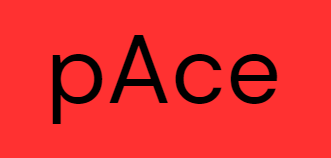

Cleaning of the dataset by removing unwanted columns

In [23]:
# droping unnecessary columns form the table
game.drop(columns={"date","Time","id"},axis=1,inplace=True) 

# Outliers and Patterns

Outlier graphs for bet dataset
 
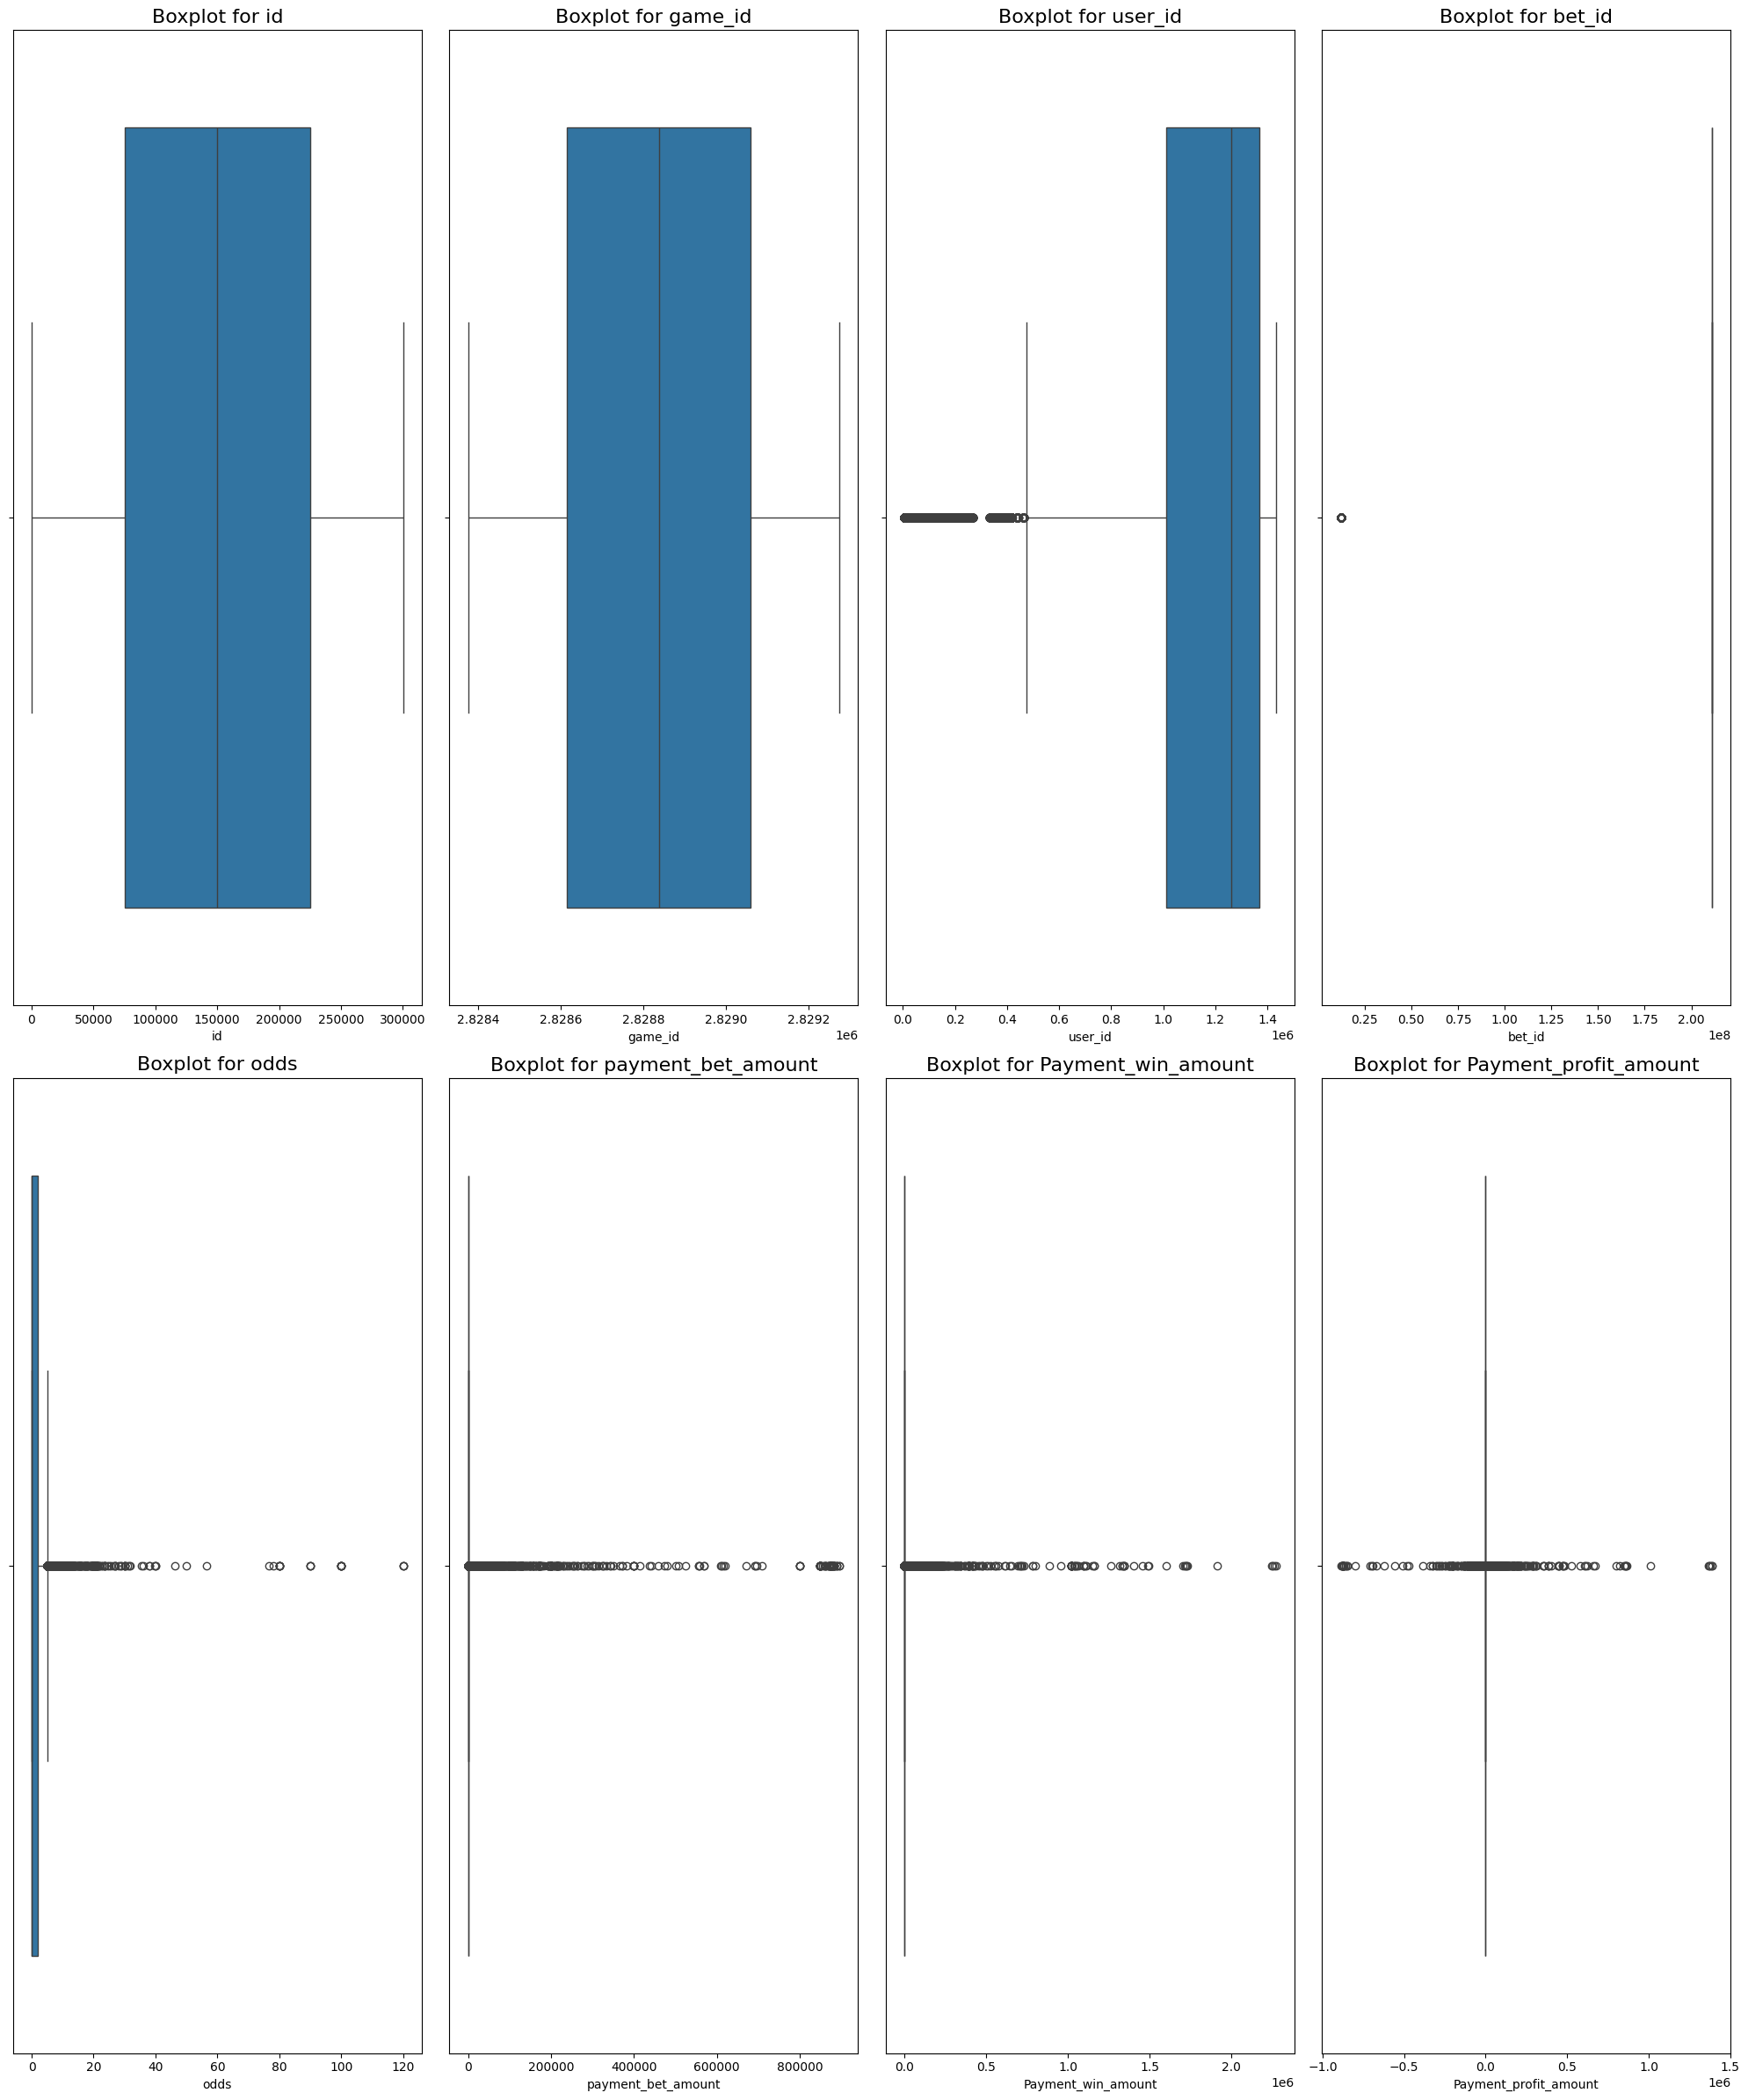

Outlier graphs for game dataset

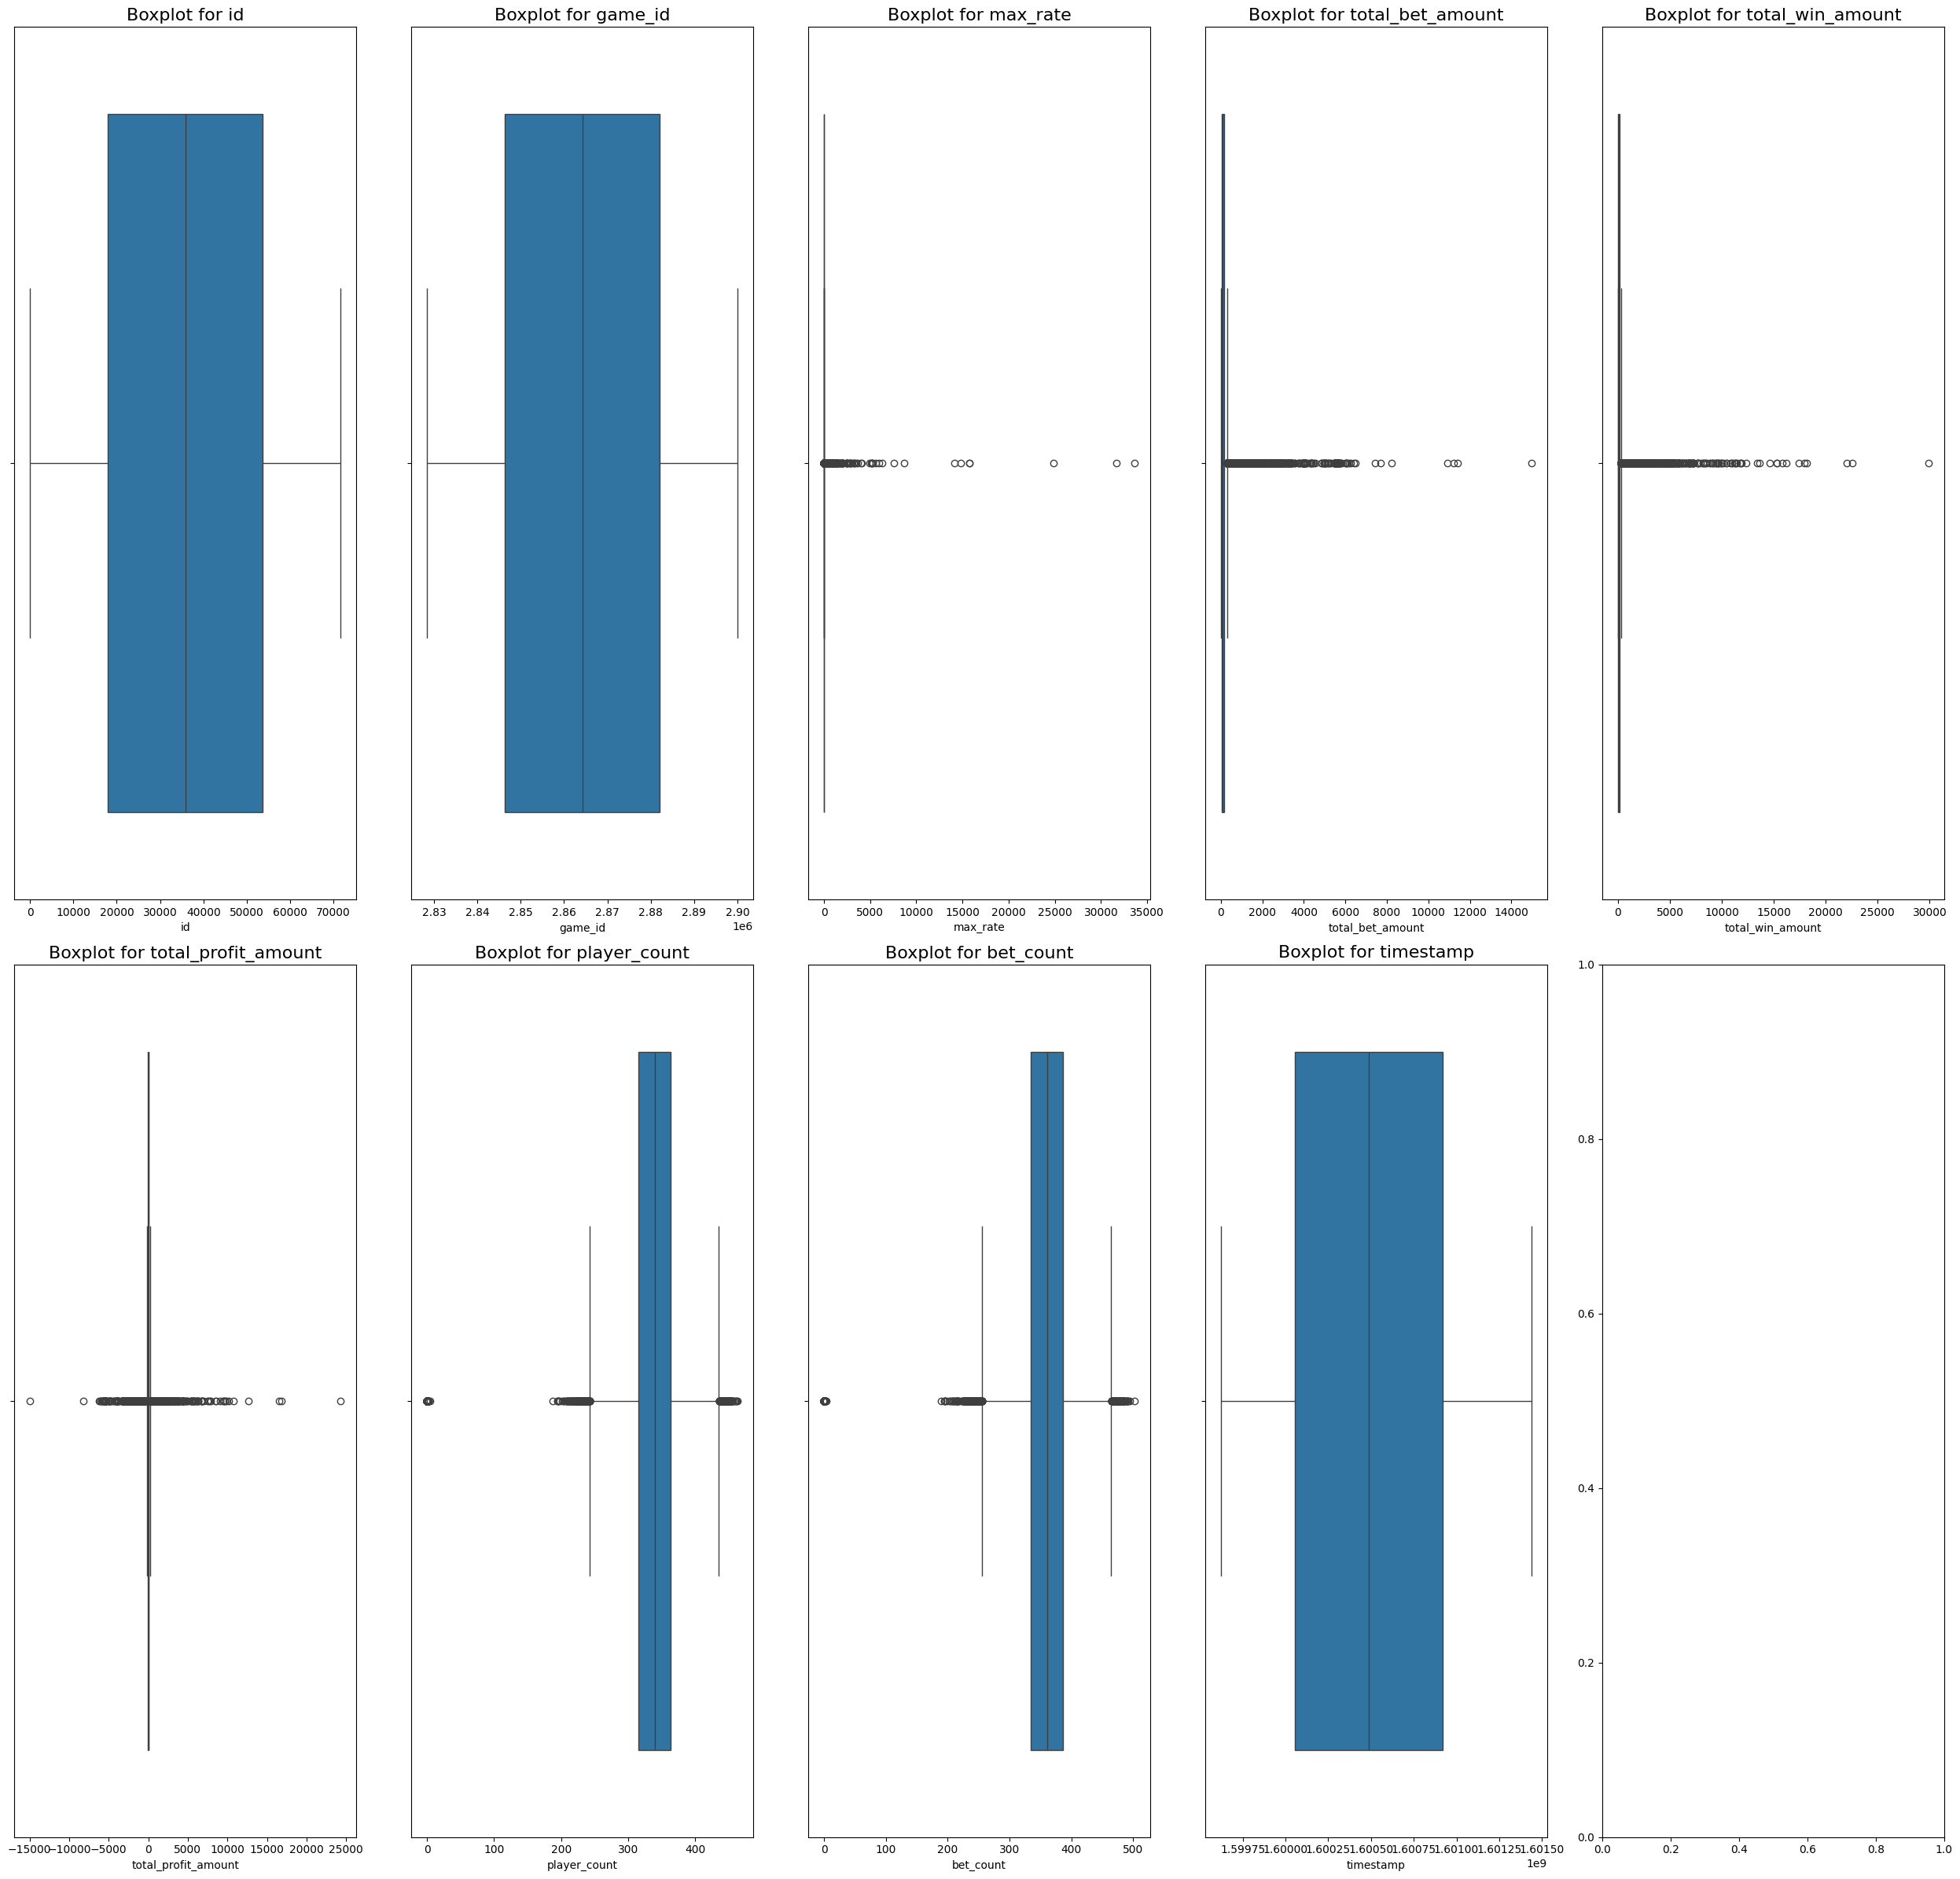

not removing Outlier as it might effect the data values with respect to `timestamp` 

# Heatmaps for identifying the relationships between columns

Corresponding heatmap for game dataset

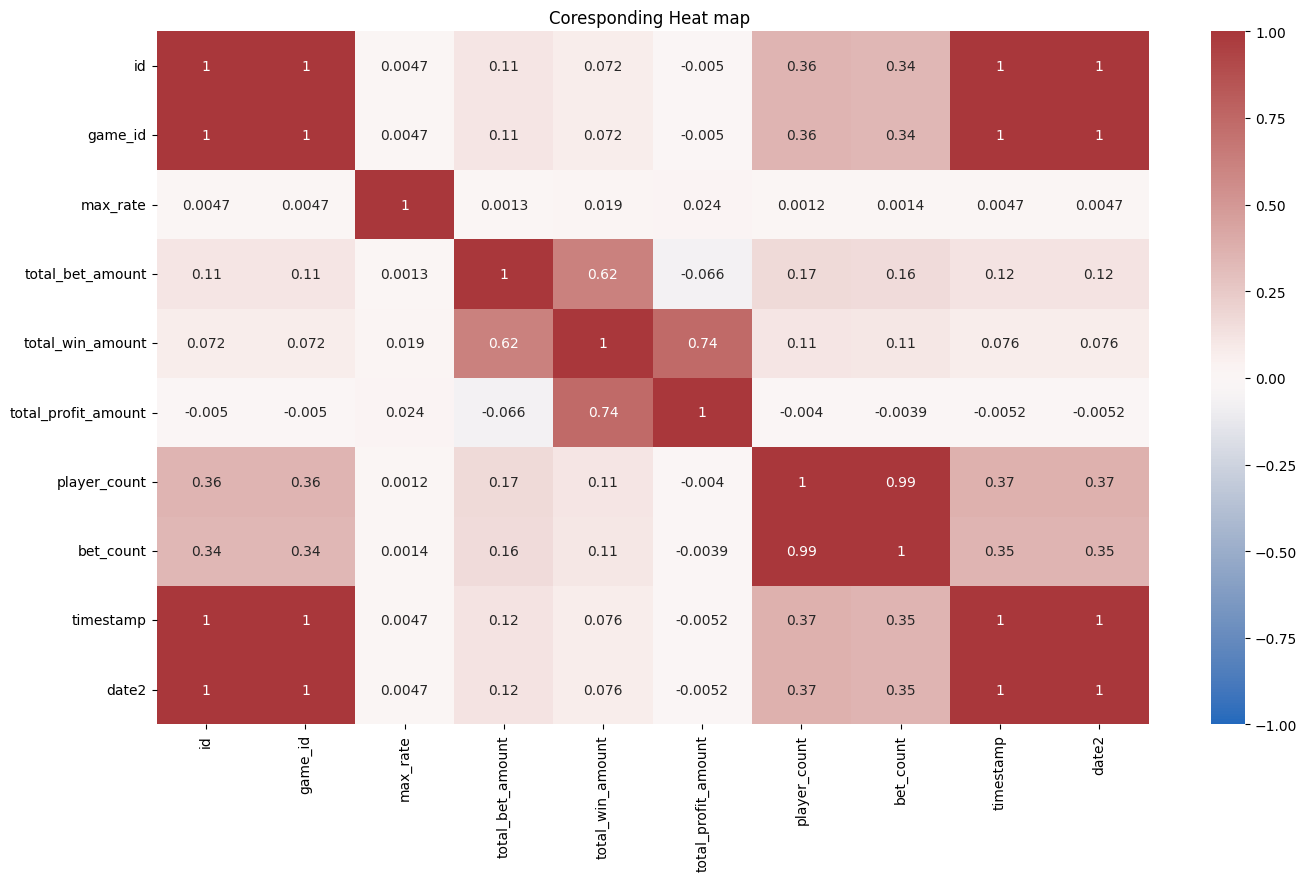

Corresponding heatmap for bet dataset

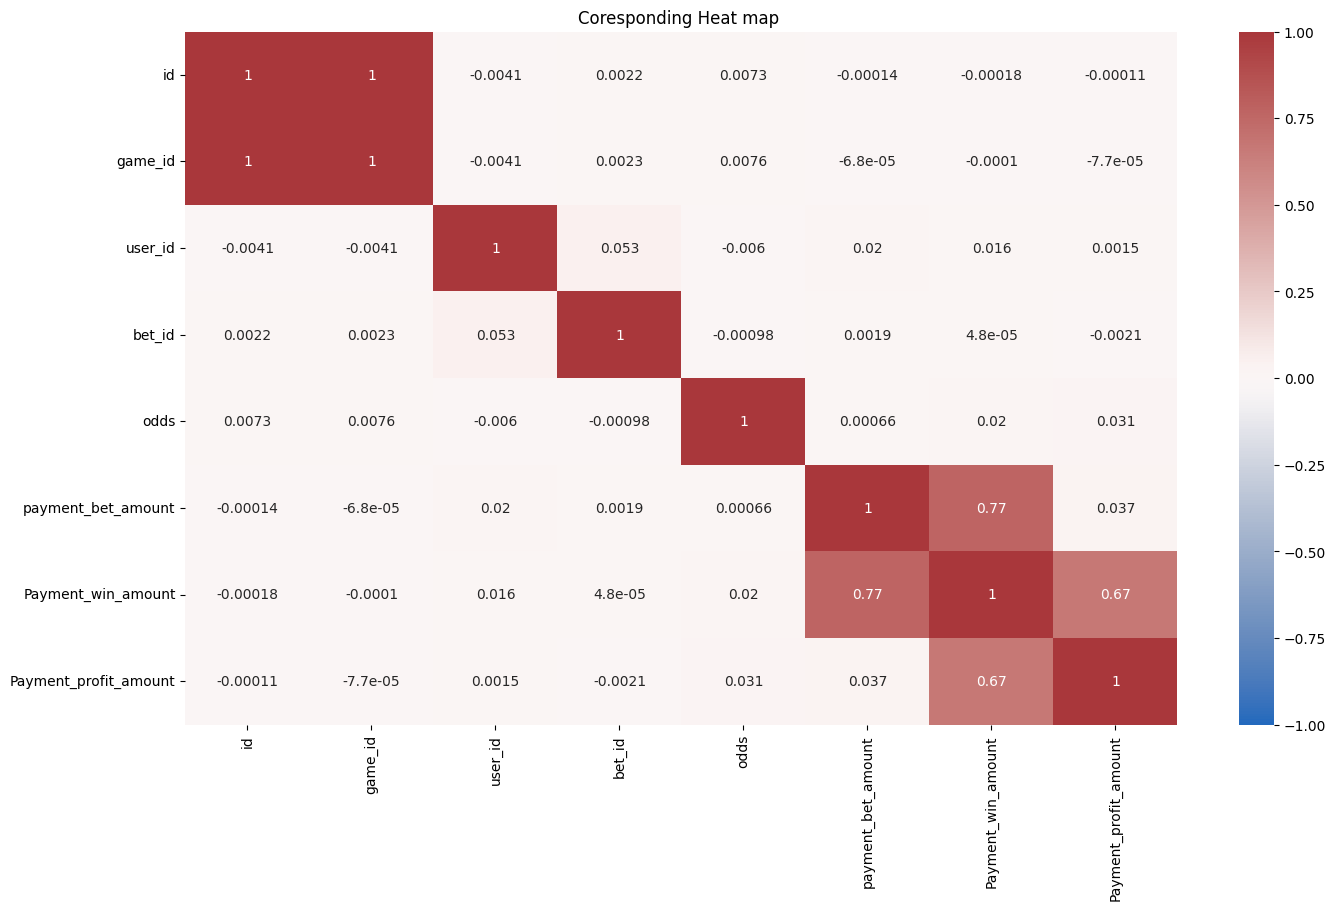

As from above we found that there is a strong relationship between `total_win_amount` with `total_profit_amount` & `payment_bet_amount` with `payment_win_amount`

which indicates that the players are more excited and concern about winning the game rather then earning more profit.

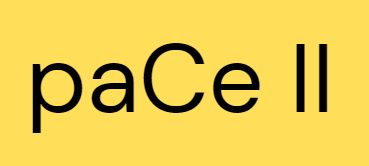

Converting columns into `categorical` format

In [5]:
# Creating dummy datasets using one-hot encoding
bet["game_type"] = (
    bet["game_type"].astype("category")
    .cat.set_categories(["normal","yellow","red","green"])
    .cat.codes
)

bet["bet_status"] = (
    bet["bet_status"].astype("category")
    .cat.set_categories(["lose","win"])
    .cat.codes
)
bet = pd.get_dummies(bet, drop_first= False)
bet.head()

,game_id,user_id,game_type,odds,bet_status,payment_bet_amount,Payment_win_amount,Payment_profit_amount
0,2828375,173570,0,0.0,0,0,0,0
1,2828375,1339924,1,0.0,0,8,0,-8
2,2828375,1139219,0,2.0,1,0,0,0
3,2828375,1329183,1,0.0,0,67,0,-67
4,2828375,1378328,0,0.0,0,0,0,0


In [24]:
# for verification
print(f"Categories for game type are \n {bet["game_type"].value_counts()} \n")
print(f"Categories for bet status are \n {bet["bet_status"].value_counts()}")

Categories for game type are 
 game_type
0    262648
2     16210
3     15459
1      5683
Name: count, dtype: int64 

Categories for bet status are 
 bet_status
0    155513
1    144487
Name: count, dtype: int64


game_type 

`normal 0` -> `red 2` -> `green 3` -> `yellow 1`

bet_status

`loss 0` -> `win 1`

# Validation of decision tree 

In [25]:
# taking bet table for regression 
y =bet.odds
X = bet[['game_id','game_type', 'bet_status', 'payment_bet_amount',  'Payment_profit_amount','Payment_win_amount']]

In [26]:
# traning the model using train_test_split function
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.25, random_state=0)

In [35]:
# fitting the model
rf_model = RandomForestRegressor( n_estimators = 1000, max_features = 3, max_samples = 100, oob_score= True)
rf = rf_model.fit(X_train,y_train)

In [36]:
# finding out of bag test for validating the model
rf.oob_score_

0.4411258843012872

<Axes: >

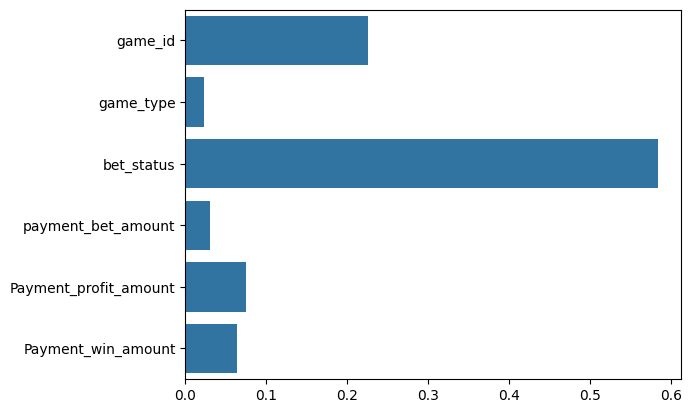

In [37]:
# Identifying major column contributers
sns.barplot(x = rf.feature_importances_ , y =rf.feature_names_in_)

In [38]:
# taking game table for validation
y2 = game.timestamp
X2 = game[['total_win_amount','total_bet_amount','total_profit_amount', 'max_rate','player_count',"bet_count",]]

In [39]:
# traning the model using train_test_split function
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size= 0.25, random_state=0)

In [40]:
# fitting the model
rf_model2 = RandomForestRegressor(n_estimators=500, max_features=3, max_samples=100, oob_score=True)
rf2 = rf_model2.fit(X2_train,y2_train)

In [41]:
# finding out of bag test for validating the model
rf2.oob_score_

0.19456124134203012

<Axes: >

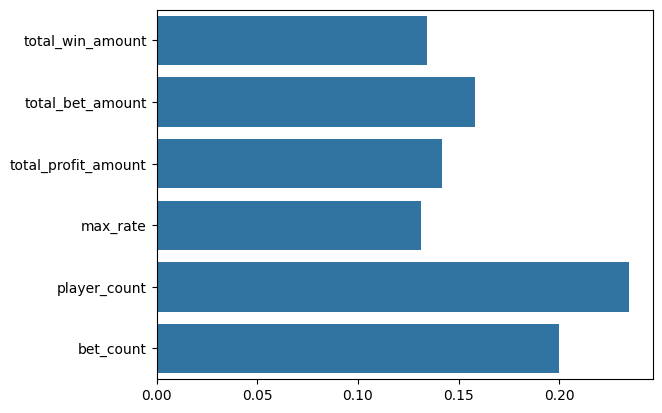

In [42]:
# Identifying major column contributers
sns.barplot(x = rf2.feature_importances_ ,y = rf2.feature_names_in_)

# Performance Evaluation

In [43]:
# Using test set for performance predictioon
pred_odds = rf.predict(X_test)
pred_tim = rf2.predict(X2_test)

In [44]:
# bets
mae = mean_absolute_error(y_true=y_test, y_pred=pred_odds)
print(f" MAE for odds is : {mae}")
# games
mae2 = mean_absolute_error(y_true=y2_test, y_pred=pred_tim)
print(f" MAE for total_win_amount is : {mae2}")

 MAE for odds is : 0.2569513099777777
 MAE for total_win_amount is : 395165.6358522359


In [45]:

mse = mean_squared_error(y_true=y_test, y_pred=pred_odds)
rmse = math.sqrt(mse)
print(f" Final result for odds by model is {rmse} ")

mse2 = mean_squared_error(y_true=y2_test, y_pred=pred_tim)
rmse2 = math.sqrt(mse2)
print(f" Final result for total_win_amount by model is {rmse2} ")

 Final result for odds by model is 1.2531600883199674 
 Final result for total_win_amount by model is 475605.4161176318 


<Axes: xlabel='odds', ylabel='odds'>

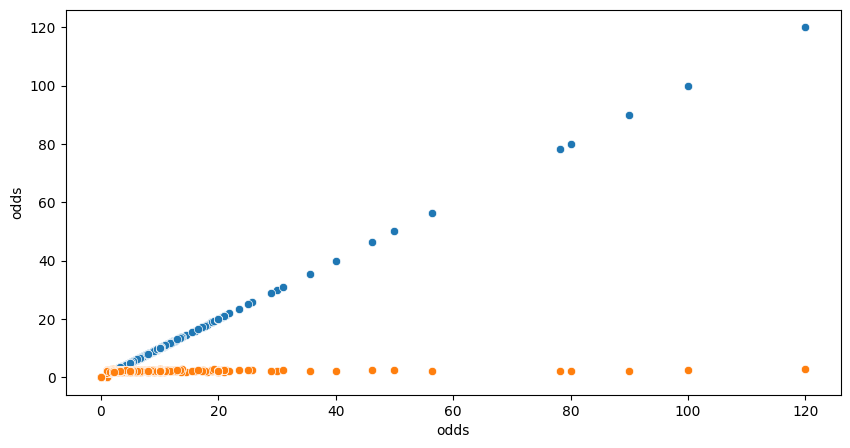

In [46]:
# plot for distribution of data points with regression line for "odds"

fix, ax = plt.subplots(figsize = (10,5))

sns.scatterplot(x = y_test, y = y_test, ax = ax)
sns.scatterplot(x = y_test, y = pred_odds, ax = ax)

<Axes: xlabel='timestamp', ylabel='timestamp'>

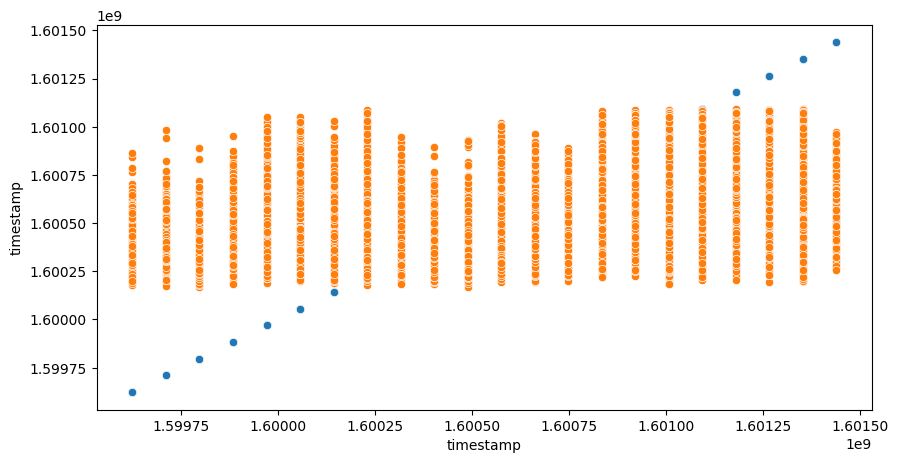

In [47]:
# plot for distribution of data points with regression line for "timestamp"
fix, ax = plt.subplots(figsize = (10,5))

sns.scatterplot(x = y2_test, y = y2_test, ax = ax)
sns.scatterplot(x = y2_test, y = pred_tim, ax = ax)

In [48]:
# merging of the columns using left join on "bet" dataset
addit = pd.merge(bet,game , on = 'game_id', how='left')

In [8]:
addit.head()

,game_id,user_id,game_type,odds,bet_status,payment_bet_amount,Payment_win_amount,Payment_profit_amount,id,max_rate,total_bet_amount,total_win_amount,total_profit_amount,player_count,bet_count,timestamp,date,date2,Time
0,2828375,173570,0,0.0,0,0,0,0,1,6.43,15.696372,26.377635,10.681263,206,217,1599622213,2020-09-08 23:30:13,2020-09-08,11:30:13
1,2828375,1339924,1,0.0,0,8,0,-8,1,6.43,15.696372,26.377635,10.681263,206,217,1599622213,2020-09-08 23:30:13,2020-09-08,11:30:13
2,2828375,1139219,0,2.0,1,0,0,0,1,6.43,15.696372,26.377635,10.681263,206,217,1599622213,2020-09-08 23:30:13,2020-09-08,11:30:13
3,2828375,1329183,1,0.0,0,67,0,-67,1,6.43,15.696372,26.377635,10.681263,206,217,1599622213,2020-09-08 23:30:13,2020-09-08,11:30:13
4,2828375,1378328,0,0.0,0,0,0,0,1,6.43,15.696372,26.377635,10.681263,206,217,1599622213,2020-09-08 23:30:13,2020-09-08,11:30:13


In [9]:
# Basic information
addit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   game_id                300000 non-null  int64         
 1   user_id                300000 non-null  int64         
 2   game_type              300000 non-null  int8          
 3   odds                   300000 non-null  float64       
 4   bet_status             300000 non-null  int8          
 5   payment_bet_amount     300000 non-null  int64         
 6   Payment_win_amount     300000 non-null  int64         
 7   Payment_profit_amount  300000 non-null  int64         
 8   id                     300000 non-null  int64         
 9   max_rate               300000 non-null  float64       
 10  total_bet_amount       300000 non-null  float64       
 11  total_win_amount       300000 non-null  float64       
 12  total_profit_amount    300000 non-null  floa

In [10]:
# Identifying potential columns as testing and traning  variables

y3 = addit[['odds','total_profit_amount']]  # using two columns as test dataset from aboove observation

X3 = addit[['game_type', 'bet_status','payment_bet_amount', 'Payment_win_amount', 'Payment_profit_amount', 'total_bet_amount', 'total_win_amount',
            'timestamp', 'player_count', 'bet_count', 'max_rate']]

In [11]:
# traning the model using train_test_split function
X3_train , X3_test , y3_train, y3_test = train_test_split(X3, y3 , test_size = 0.25, random_state = 42)

In [12]:
# Fitting the model 
rf_model3 = RandomForestRegressor(n_estimators = 1000, max_features = 4, max_samples = 500, oob_score=True)
rf3 = rf_model3.fit(X3_train, y3_train)

In [14]:
# finding out of bag test for validating the model
rf3.oob_score_

0.6913815388401234

<Axes: >

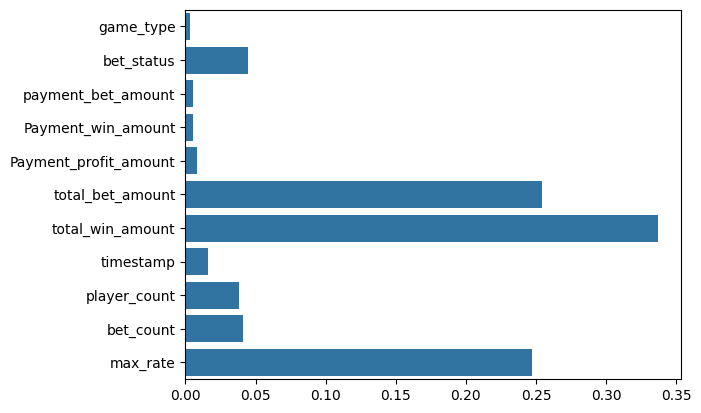

In [13]:
# Identifying major column contributers
sns.barplot(x = rf3.feature_importances_ , y = rf3.feature_names_in_ )

# Performation Evaluation Part-2

In [15]:
pred_cmb = rf3.predict(X3_test)

In [19]:
# for 'total_profit_amount'
maem = mean_absolute_error(y_true=y3_test["total_profit_amount"], y_pred=pred_cmb[:,0])
print(f" MAE of total_profit_amount data is :{maem}")

msem = mean_squared_error(y_true=y3_test["total_profit_amount"] , y_pred=pred_cmb[:,0])
rmsem = math.sqrt(msem)
print(f" MSE of total_profit_amount data is :{rmsem}")

# for 'odds'
maeo = mean_absolute_error(y_true=y3_test["odds"], y_pred=pred_cmb[:,1])
print(f" MAE of odds is :{maeo}")

mseo = mean_squared_error(y_true=y3_test["odds"] , y_pred=pred_cmb[:,1])
rmseo = math.sqrt(mseo)
print(f" MSE of odds is :{rmseo}")

 MAE of total_profit_amount data is :56.26047911004317
 MSE of total_profit_amount data is :84.17974480582824
 MAE of odds is :52.28240643897611
 MSE of odds is :73.32033327688251


In [20]:
# for combined
mae3 = mean_absolute_error(y_true=y3_test, y_pred=pred_cmb)
print(f" MAE of above data is :{mae3}")

mse3 = mean_squared_error(y_true=y3_test, y_pred=pred_cmb)
rmse3 = math.sqrt(mse3)
print(f" MSE of the above data is :{rmse3}")

 MAE of above data is :4.703510375421543
 MSE of the above data is :12.874169016485045


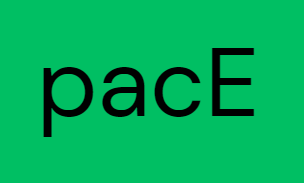

# Final Result 

Players who  are much prone in getting addicted.

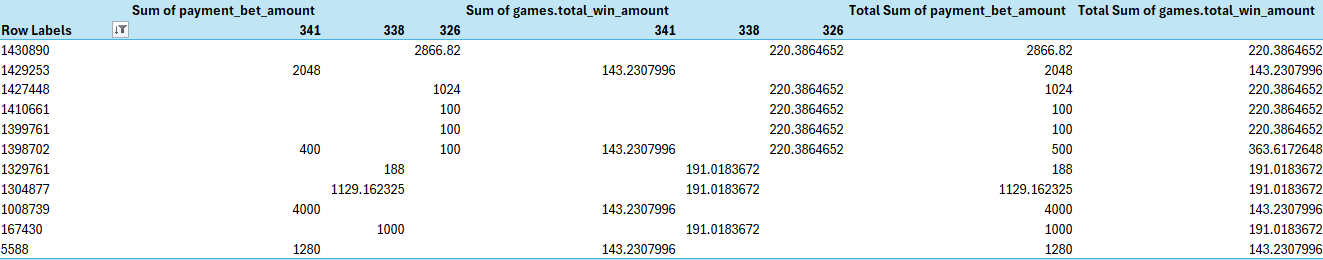

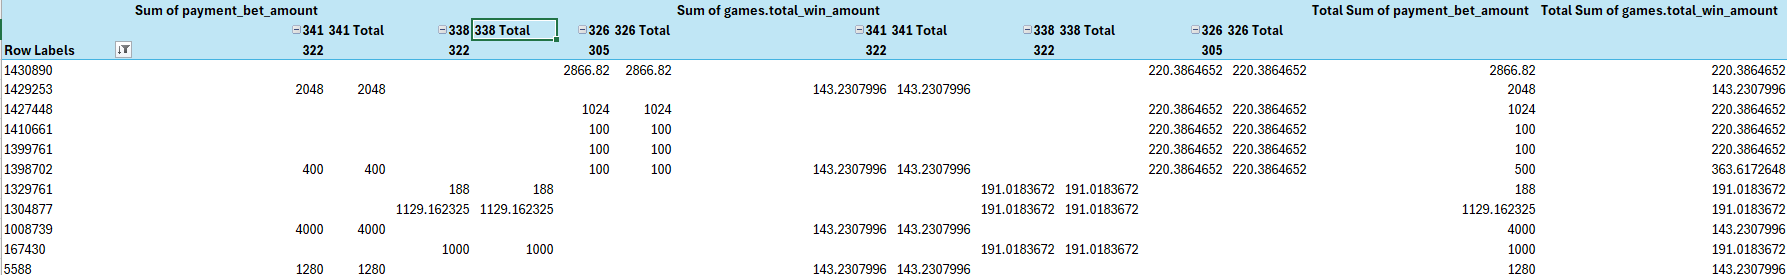

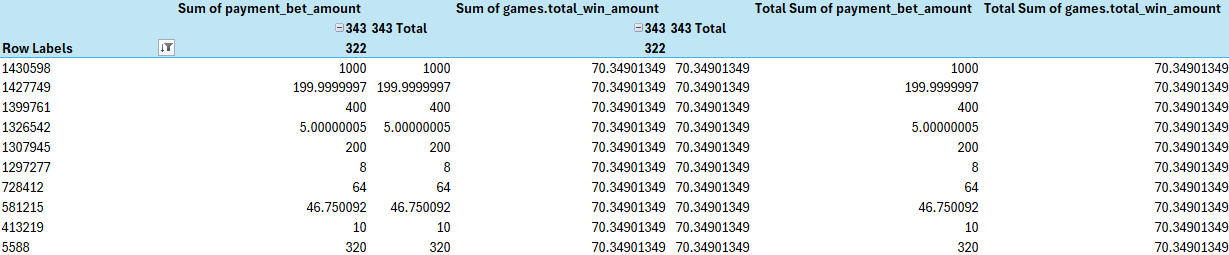

Player ID: Unique identifier for each player to track individual behavior.
Session Frequency: Number of poker sessions played over the 30 days.
Session Duration: Total time spent per session (in minutes or hours).
Total Play Time: Cumulative time spent playing poker over 30 days.
Bet Amount: Total amount wagered per session and over 30 days.
Win/Loss Ratio: Net financial outcome (wins minus losses) per session and overall.
Deposit Frequency: Number of deposits made to the player’s account.
Deposit Amount: Total and average amount deposited over 30 days.
Game Type: Specific poker variant (e.g., Texas Hold’em, Omaha) and stakes (low, medium, high).
Time of Play: Times of day when sessions occur (e.g., late-night play may indicate issues).
Chasing Behavior: Instances of increasing bet sizes after losses within a session.
Bankroll Volatility: Fluctuations in the player’s account balance (e.g., rapid drops or spikes).
In-Game Actions: Metrics like number of hands played, fold/call/raise frequency, or aggressive play patterns.
Device/Location Data: Whether the player accesses the game from multiple devices or locations, indicating compulsive access.
Self-Exclusion Attempts: Any attempts to limit or stop play (e.g., setting deposit limits or requesting account restrictions).